In [1]:
# Creation of mobius

%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import random
import visvis as vv
import scipy
import math 
import skimage
import os 
#import sklearn
from skimage import measure
from numpy import sin, cos, sinh, cosh,arcsin,arccos, pi, exp, abs, max,min, sinh, cosh
from visvis import Point, Pointset
from scipy.spatial import Voronoi, voronoi_plot_2d, distance
from mpl_toolkits.mplot3d import axes3d
from matplotlib.animation import FuncAnimation
from scipy.spatial import distance

<IPython.core.display.Javascript object>


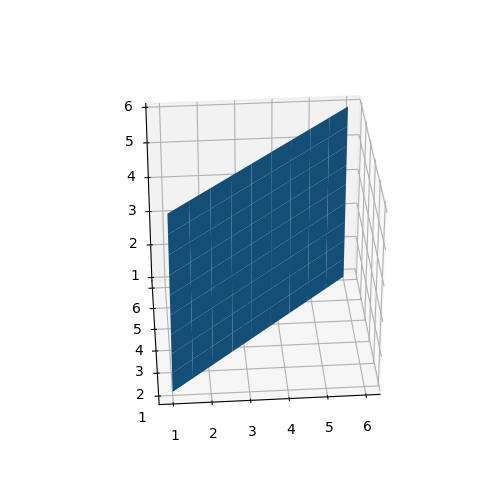

In [3]:
# Parametrized surface to mesh 

div_num = 10

U = np.linspace(1,6,div_num)
V = np.linspace(1,6,div_num)

u,v = np.meshgrid(U,V)


x2 = u
y2 = u
z2 = v


fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x2, y2, z2)
    


plt.show()

In [11]:
# First method 

n=50
bot = -2 
top = 2 

x = np.linspace(bot,top,n)
y = np.linspace(bot,top,n)
z = np.linspace(bot,top,n)
X, Y, Z =  np.meshgrid(x, y, z)

'''
# array to measure 
array1 = np.reshape(np.stack((X,Y,Z)),(3, n**3)).T
array2 = np.reshape(np.stack((x2,y2,z2)),(3,div_num**2)).T

final_array = distance.cdist(array1,array2).min(axis=1)   
 
vol = np.reshape(final_array,(n,n,n))
# Extract a 2D surface mesh from a 3D volume (F=0)

mesh = vv.isosurface(vol,0.2)
m = vv.mesh(mesh)

#vv.meshWrite(os.path.expanduser('~\\Desktop\\CAGD\\CADfiles\\paramesh5.stl'), m)
app = vv.use()
app.Run()
''' 



"\n# array to measure \narray1 = np.reshape(np.stack((X,Y,Z)),(3, n**3)).T\n\narray2 = np.reshape(np.stack((x2,y2,z2)),(3,div_num**2)).T\n\n\nfinal_array = distance.cdist(array1,array2).min(axis=1)   \n\n\nprint(final_array.shape)\n \nvol = np.reshape(final_array,(n,n,n))\n\n\n# Extract a 2D surface mesh from a 3D volume (F=0)\n\nmesh = vv.isosurface(vol,0.2)\nm = vv.mesh(mesh)\n\n#vv.meshWrite(os.path.expanduser('~\\Desktop\\CAGD\\CADfiles\\paramesh5.stl'), m)\napp = vv.use()\napp.Run()\n"

In [14]:
div_num = 50 
width = 0.5
R = 1
t = np.linspace(0,2*pi,div_num)
s = np.linspace(-width,width,div_num)

T,S = np.meshgrid(t,s)

x1 = (R+S*cos(0.5*T))*cos(T) 
y1 = (R+S*cos(0.5*T))*sin(T) 
z1 = R+S*sin(0.5*T)

In [15]:
# Second Method 
array2 = np.reshape(np.stack((x1,y1,z1)),(3,div_num**2)).T

r = 0.005 
vol2 = 0
for i in range(array2.shape[0]):
    vol2 += r**2/((X-array2[i,0])**2 +(Y-array2[i,1])**2 +(Z-array2[i,2])**2)**2

mesh = vv.isosurface(vol2,1)
m = vv.mesh(mesh)

#vv.meshWrite(os.path.expanduser('~\\Desktop\\CAGD\\CADfiles\\mobius3.stl'), m)
app = vv.use()
app.Run()

 
    